In [2]:
#! pip install scikit-learn

In [3]:
# Import all the tools we need

# Zwykła EDA (eksploracyjna analiza danych) i biblioteki wykresów
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# chcemy, aby nasze wykresy pojawiły się w notatniku
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

ImportError: cannot import name 'plot_roc_curve' from 'sklearn.metrics' (C:\Users\Oswald\anaconda3\lib\site-packages\sklearn\metrics\__init__.py)

In [5]:
df = pd.read_csv("ph_v1_days.csv")
df.shape # (rows, columns)

(212, 99)

In [6]:
df.head()

,Date,PH_morning,PH_midday,PH_evening,PH_avg,Ailment,Gym,Liquid,Lemon water,Tea(black/green),...,Cookie,Cake,Bun,Croissant,Chocolate,Candies,Halva,Marshmallow,Red caviar,Jelly
0,06.09.2017,5.41,5.25,5.55,5.40,NaN,NaN,1300,250.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,07.09.2017,7.06,5.70,5.32,6.03,NaN,1.0,1300,250.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08.09.2017,6.26,5.75,5.43,5.81,NaN,NaN,1350,250.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,09.09.2017,5.35,6.85,6.09,6.10,NaN,NaN,2350,250.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.09.2017,6.62,6.34,5.23,6.06,NaN,1.0,1600,250.0,NaN,...,NaN,NaN,150.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.tail()

,Date,PH_morning,PH_midday,PH_evening,PH_avg,Ailment,Gym,Liquid,Lemon water,Tea(black/green),...,Cookie,Cake,Bun,Croissant,Chocolate,Candies,Halva,Marshmallow,Red caviar,Jelly
207,01.04.2018,6.33,5.39,5.52,5.75,NaN,1.0,2900,300.0,250.0,...,60.0,10.0,NaN,NaN,NaN,NaN,69.0,NaN,NaN,NaN
208,02.04.2018,4.90,5.32,5.90,5.37,NaN,NaN,3200,300.0,NaN,...,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
209,03.04.2018,6.27,5.64,5.55,5.82,NaN,1.0,2850,300.0,NaN,...,60.0,NaN,NaN,60.0,NaN,NaN,59.0,NaN,NaN,NaN
210,04.04.2018,5.34,4.78,4.98,5.03,NaN,NaN,2600,300.0,NaN,...,15.0,69.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
211,05.04.2018,5.97,5.42,5.38,5.59,NaN,1.0,3130,300.0,250.0,...,45.0,55.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# Let's find out how many of each class there
df["Gym"].value_counts()

1.0    62
Name: Gym, dtype: int64

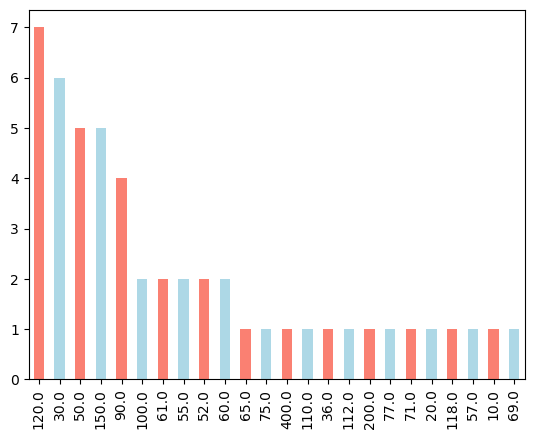

In [21]:
df["Cake"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 212 entries, 0 to 211
Data columns (total 99 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Date                          212 non-null    object 
 1   PH_morning                    212 non-null    float64
 2   PH_midday                     212 non-null    float64
 3   PH_evening                    210 non-null    float64
 4   PH_avg                        212 non-null    float64
 5   Ailment                       17 non-null     float64
 6   Gym                           62 non-null     float64
 7   Liquid                        212 non-null    int64  
 8   Lemon water                   190 non-null    float64
 9   Tea(black/green)              21 non-null     float64
 10  Fruit tea                     205 non-null    float64
 11  Water                         164 non-null    float64
 12  Latte                         17 non-null     float64
 13  Miner

In [13]:
# Are there any missing values?
df.isna().sum()

Date             0
PH_morning       0
PH_midday        0
PH_evening       2
PH_avg           0
              ... 
Candies        168
Halva          200
Marshmallow    209
Red caviar     199
Jelly          209
Length: 99, dtype: int64

In [14]:
df.describe()

,PH_morning,PH_midday,PH_evening,PH_avg,Ailment,Gym,Liquid,Lemon water,Tea(black/green),Fruit tea,...,Cookie,Cake,Bun,Croissant,Chocolate,Candies,Halva,Marshmallow,Red caviar,Jelly
count,212.000000,212.000000,210.000000,212.000000,17.0,62.0,212.000000,190.000000,21.000000,205.000000,...,125.00000,51.000000,14.000000,28.000000,19.000000,44.000000,12.000000,3.000000,13.000000,3.000000
mean,6.081462,5.968491,5.879143,5.975000,1.0,1.0,2048.962264,256.315789,352.380952,545.780488,...,50.92000,87.372549,84.357143,57.142857,12.631579,25.772727,29.833333,25.000000,23.384615,210.666667
std,0.668496,0.636376,0.615275,0.486951,0.0,0.0,615.694120,62.038606,114.538411,151.364304,...,33.68368,61.573033,38.788593,18.323663,6.229058,19.353341,20.359645,8.660254,18.993589,189.159545
min,4.810000,4.480000,4.460000,4.750000,1.0,1.0,900.000000,0.000000,250.000000,150.000000,...,10.00000,10.000000,24.000000,22.000000,5.000000,5.000000,10.000000,20.000000,10.000000,52.000000
25%,5.537500,5.460000,5.430000,5.625000,1.0,1.0,1550.000000,250.000000,250.000000,500.000000,...,25.00000,50.000000,52.500000,50.000000,8.500000,15.000000,15.000000,20.000000,10.000000,106.000000
50%,6.125000,5.980000,5.850000,5.995000,1.0,1.0,1900.000000,250.000000,300.000000,600.000000,...,45.00000,71.000000,78.500000,60.000000,10.000000,20.000000,18.500000,20.000000,15.000000,160.000000
75%,6.592500,6.470000,6.337500,6.340000,1.0,1.0,2585.000000,300.000000,450.000000,600.000000,...,60.00000,120.000000,115.000000,60.000000,20.000000,25.250000,43.250000,27.500000,30.000000,290.000000
max,7.550000,7.370000,7.410000,7.040000,1.0,1.0,3450.000000,300.000000,600.000000,1200.000000,...,220.00000,400.000000,150.000000,120.000000,25.000000,90.000000,69.000000,35.000000,70.000000,420.000000


In [32]:
# Compare target column with sex column
pd.crosstab(df.PH_avg, df.Liquid)

Liquid,900,1000,1100,1150,1200,1250,1275,1300,1350,1400,...,3125,3130,3150,3195,3200,3275,3305,3350,3375,3450
PH_avg,,,,,,,,,,,,,,,,,,,,,
4.75,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.84,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4.95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4.98,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6.91,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6.96,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6.99,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


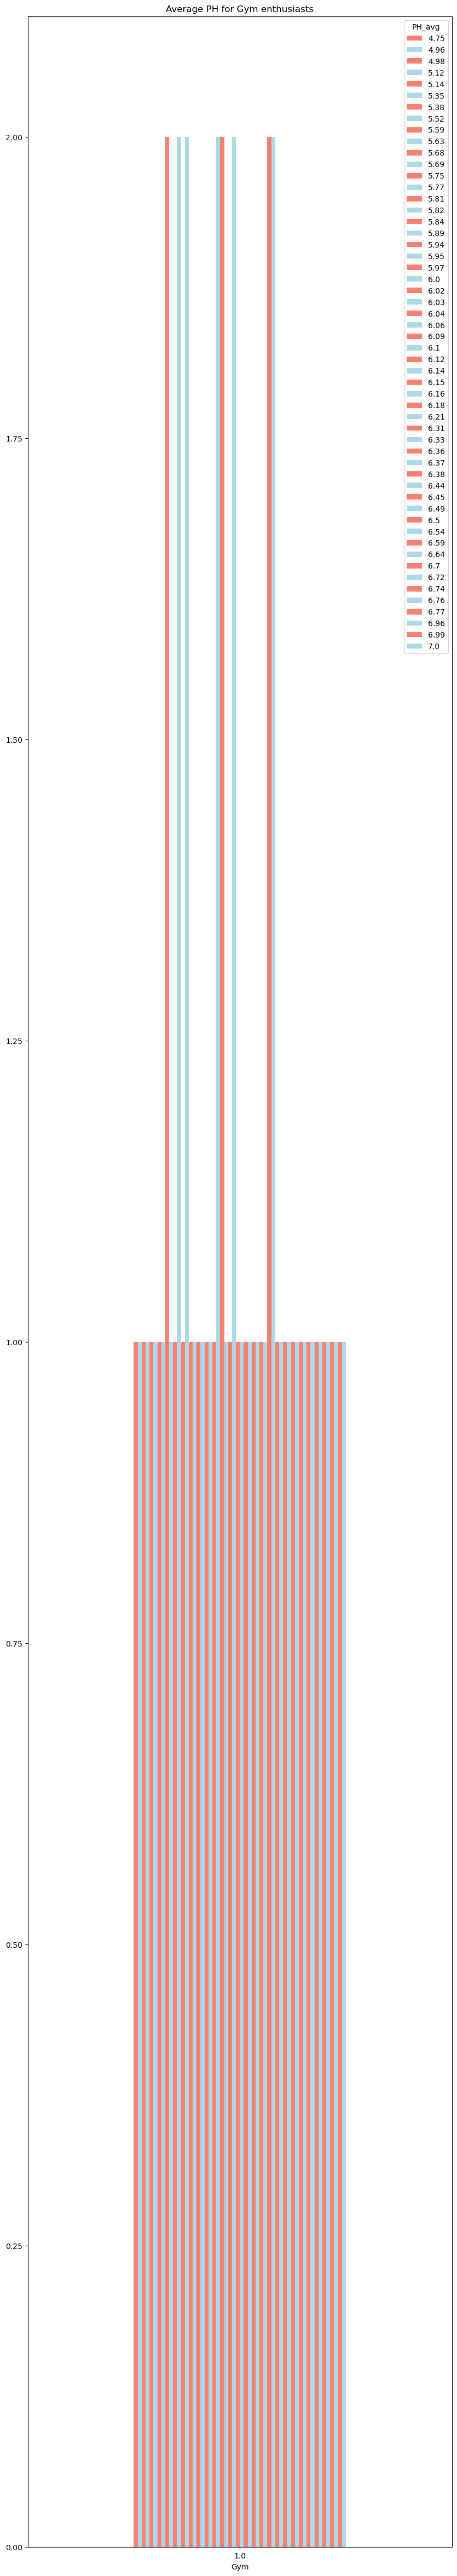

In [29]:
# Create a plot of crosstab
pd.crosstab(df.Gym, df.PH_avg).plot(kind="bar",
                                    figsize=(10, 60),
                                    color=["salmon", "lightblue"])
plt.title("Average PH for Gym enthusiasts")
plt.xticks(rotation=0);

## Wiek a maksymalne tętno w przypadku chorób serca

In [31]:
# Create another figure
plt.figure(figsize=(10, 6))

# Scatter with positive examples
plt.scatter(df.PH_avg[df.Gym==1],
            df.thalach[df.Gym==1],
            c="salmon")

# Scatter with negative examples
plt.scatter(df.Liquid[df.Gym==0],
            df.thalach[df.Gym==0],
            c="lightblue")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

AttributeError: 'DataFrame' object has no attribute 'thalach'

<Figure size 1000x600 with 0 Axes>

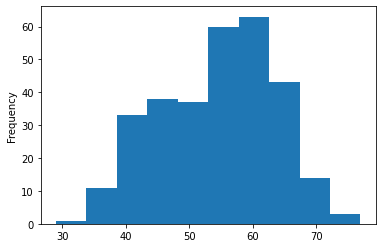

In [19]:
# Check the distribution of the age column with a histogram
df.age.plot.hist();

## Częstotliwość chorób serca według rodzaju bólu w klatce piersiowej
1. cp - chest pain type
    - 0: Typical angina: chest pain related decrease blood supply to the heart
    - 1: Atypical angina: chest pain not related to heart
    - 2: Non-anginal pain: typically esophageal spasms (non heart related)
    - 3: Asymptomatic: chest pain not showing signs or disease

In [20]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


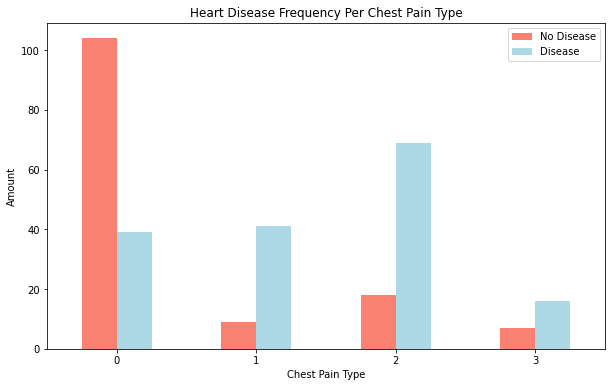

In [21]:
# Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                   figsize=(10, 6),
                                   color=["salmon", "lightblue"])

# Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Amount")
plt.legend(["No Disease", "Disease"])
plt.xticks(rotation=0);

In [22]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [23]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


(14.0, 0.0)

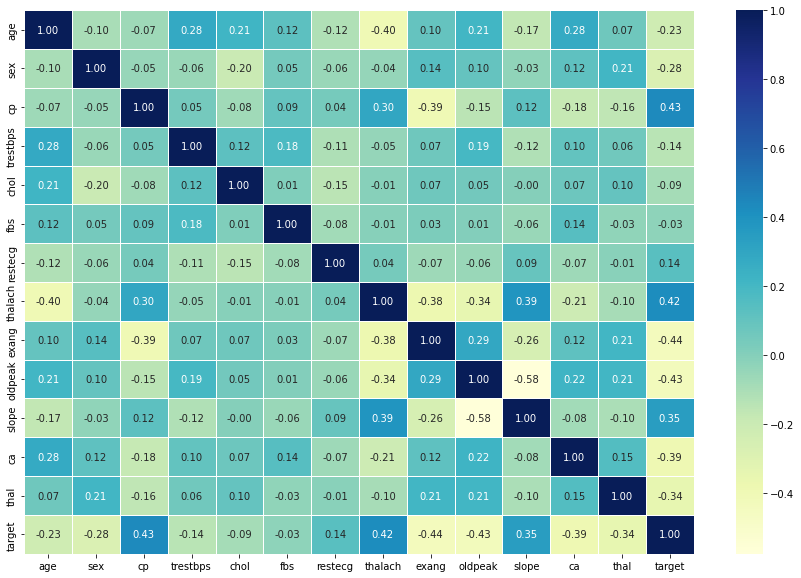

In [24]:
# Let's make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim()

## 5. Modelowanie

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [26]:
# Split data into X and y
X = df.drop("target", axis=1)

y = df["target"]

In [27]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [28]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [29]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)

In [30]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [31]:
y_train, len(y_train)

(132    1
 202    0
 196    0
 75     1
 176    0
       ..
 188    0
 71     1
 106    1
 270    0
 102    1
 Name: target, Length: 242, dtype: int64,
 242)

Teraz podzieliliśmy nasze dane na zestawy treningowe i testowe, czas zbudować model uczenia maszynowego.

Wytrenujemy go (znajdź wzorce) na zestawie treningowym.

I przetestujemy to (użyj wzorców) na zestawie testowym.

Wypróbujemy 3 różne modele uczenia maszynowego:
1. Logistic Regresssion
2. K-Nearest Neighbors Classifier
3. Random Forest Classifier

In [32]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
          "KNN": KNeighborsClassifier(),
          "Random Forest": RandomForestClassifier()}

# Create a function to fit and score models
def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    X_train: training data (no labels)
    X_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    # set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(X_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

In [33]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

C:\Users\marce\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Porównanie modeli

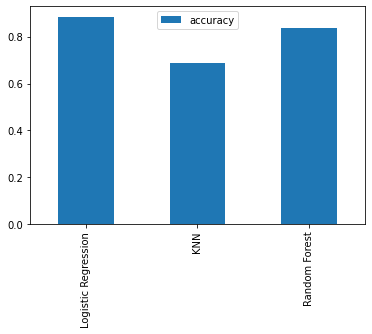

In [34]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

Teraz mamy model bazowy... i wiemy, że pierwsze przewidywania modelu nie zawsze są tym, na czym powinniśmy opierać nasze następne kroki. Co powinniśmy zrobić?

Spójrzmy na następujące:
* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Strojenie hiperparametrów (ręcznie)

In [35]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors
neighbors = range(1, 21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    # Fit the algorithm
    knn.fit(X_train, y_train)
    
    # Update the training scores list
    train_scores.append(knn.score(X_train, y_train))
    
    # Update the test scores list
    test_scores.append(knn.score(X_test, y_test))

In [36]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [37]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data: 75.41%


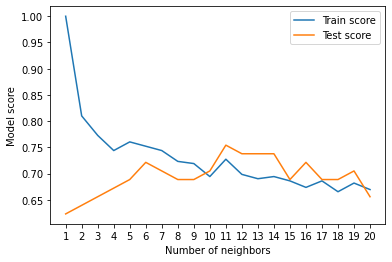

In [38]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores)*100:.2f}%")

### Strojenie hiperparametrów za pomocą RandomizedSearchCV
Dostosujemy:
* LogisticRegression()
* RandomForestClassifier()

...using RandomizedSearchCV

In [39]:
# Create a hyperparameter grid for LogisticRegression
log_reg_grid = {"C": np.logspace(-4, 4, 20),
                "solver": ["liblinear"]}

# Create a hyperparamter grid for RandomForestClassifier
rf_grid = {"n_estimators": np.arange(10, 1000, 50),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2)}

Teraz mamy skonfigurowane siatki hiperparametrów dla każdego z naszych modeli, dostosujmy użycie RandomizedSearchCV...

In [40]:
# Tune LogisticRegression

np.random.seed(42)

# Setup random hypterparameter search for LogisticRegression
rs_log_reg = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fit random hyperparamter search model for LogisticRegression
rs_log_reg.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [41]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [42]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

Teraz dostosowaliśmy LogisticRegression(). Zróbmy to samo dla RandomForestClassifer()...

In [43]:
# Setup random seed
np.random.seed(42)

# Setup random hyperparamter search for RandomForestClassifier
rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                           verbose=True)

# Fit random hyperparamter search model for RandomForestClassifier()
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [44]:
# Find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [45]:
# Evalutate the randomized search RandomForestClassifier model
rs_rf.score(X_test, y_test)

0.8688524590163934

## Dostrajanie hiperparametrów za pomocą GridSearchCV
Ponieważ nasz model LogisticRegression zapewnia jak dotąd najlepsze wyniki, spróbujemy je ulepszyć za pomocą GridSearchCV...

In [46]:
# Different hyperparameters for our LogisticRegression model
log_reg_grid = {"C": np.logspace(-4, 4, 30),
                "solver": ["liblinear"]}

# Setup grid hyperparamter search for LogisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit grid hyperparameter search model
gs_log_reg.fit(X_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [47]:
# Check the best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [48]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(X_test, y_test)

0.8852459016393442

## Ocena naszego dostosowanego klasyfikatora uczenia maszynowego, poza dokładnością
* ROC curve and AUC score
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

...i byłoby wspaniale, gdyby tam, gdzie to możliwe, zastosowano walidację krzyżową.

Aby dokonać porównań i ocenić nasz wytrenowany model, najpierw musimy dokonać prognoz.

In [49]:
# Make predictions with tuned model
y_preds = gs_log_reg.predict(X_test)

In [50]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [51]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

C:\Users\marce\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


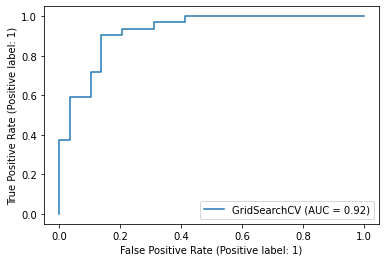

In [54]:
# Plot ROC curve and calculate AUC metric
plot_roc_curve(gs_log_reg, X_test, y_test)
# RocCurveDisplay.from_predictions(gs_log_reg, X_test, y_test)

In [55]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


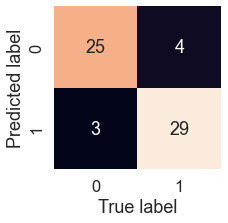

In [56]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
    bottom, top = ax.get_ylim()
    ax.set_ylim()
    
plot_conf_mat(y_test, y_preds)

Teraz mamy krzywą ROC, metrykę AUC i macierz pomyłek,

zdobądźmy raport klasyfikacyjny, a także potwierdzoną krzyżowo precyzję, przypomnienie i wynik f1.

In [57]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



## Oblicz metryki oceny za pomocą walidacji krzyżowej
Obliczymy dokładność, precyzję, przywołanie i wynik f1 naszego modelu za pomocą walidacji krzyżowej,

w tym celu użyjemy `cross_val_score()`.

In [58]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [59]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

In [60]:
# Cross-validated accuracy
cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv=5,
                         scoring="accuracy")

cv_acc

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [61]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [62]:
# Cross-validated precision
cv_precision = cross_val_score(clf,
                               X,
                               y,
                               cv=5,
                               scoring="precision")
cv_precision=np.mean(cv_precision)
cv_precision

0.8215873015873015

In [63]:
# Cross-validated recall
cv_recall = cross_val_score(clf,
                            X, 
                            y,
                            cv=5,
                            scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [64]:
# Cross-validated f1-score
cv_f1 = cross_val_score(clf,
                        X,
                        y,
                        cv=5,
                        scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

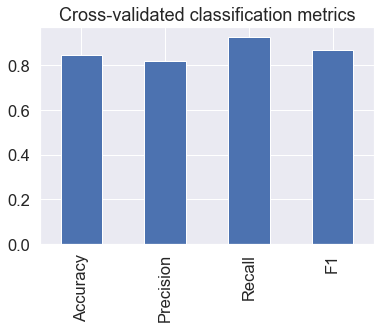

In [65]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                           "Precision": cv_precision,
                           "Recall": cv_recall,
                           "F1": cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validated classification metrics",
                      legend=False);

## Ważność cechy
Znaczenie cechy to kolejne pytanie: „które cechy w największym stopniu przyczyniły się do wyników modelu i jak się przyczyniły?”

Określanie ważności cechy jest inne dla każdego modelu uczenia maszynowego. Jednym ze sposobów określenia ważności cechy jest wyszukanie „(NAZWA MODELU) ważności cechy”.

Znajdźmy ważność cechy dla naszego modelu LogisticRegression...

In [66]:
# Fit an instance of LogisticRegression
clf = LogisticRegression(C=0.20433597178569418,
                         solver="liblinear")

clf.fit(X_train, y_train);

In [67]:
# Check coef_
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [68]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [69]:
# Match coef's of features to columns
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

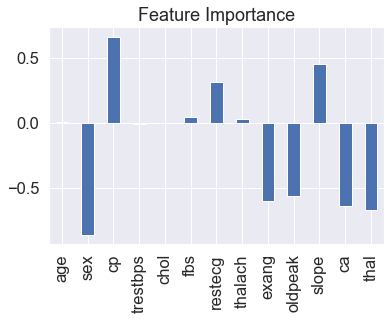

In [70]:
# Visualize feature importance
feature_df = pd.DataFrame(feature_dict, index=[0])
feature_df.T.plot.bar(title="Feature Importance", legend=False);

In [71]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


In [72]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


slope - the slope of the peak exercise ST segment
* 0: Upsloping: better rate with exercise (uncommon)
* 1: Flatsloping: minimal change (typical healthy heart)
* 2: Downslopins: signs of unhealthy heart

## 6. Eksperymentowanie
Jeśli nie osiągnąłeś jeszcze swojego wskaźnika oceny... zadaj sobie pytanie...
* Czy możesz zebrać więcej danych?
* Czy możesz wypróbować lepszy model? Jak CatBoost lub XGBoost?
* Czy możesz ulepszyć obecne modele? (poza tym, co do tej pory zrobiliśmy)
* Jeśli Twój model jest wystarczająco dobry (osiągnąłeś metrykę oceny), jak byś go wyeksportował i udostępnił innym?